In [1]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP, #
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO     #
# DESTE EP.                                                      #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,   #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM          #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                             #
#                                                                #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS        #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A          #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E        #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS    #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                           #
#                                                                #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO         #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR             #
# DESONESTIDADE ACADÊMICA.                                       #
#                                                                #
#                                                                #
# Nome: Matheus Sanches Jurgensen                                #
# NUSP: 12542199                                                 #
# Turma: MAC0417                                                 #
# Prof.: Ronaldo Fumio                                           #
##################################################################

# EP2 MAC0417 - Notebook 1
Nome: Matheus Sanches Jurgensen \
NUSP: 12542199

## Taking a Look into the Data

### Importing Methods from EP1

In [2]:
from utils.ep1 import show_samples_all_classes, show_global_table, show_class_tables
%load_ext autoreload
%autoreload 2
original_dataset_folder = './images/originalDataset'

### Showing Samples from All Classes

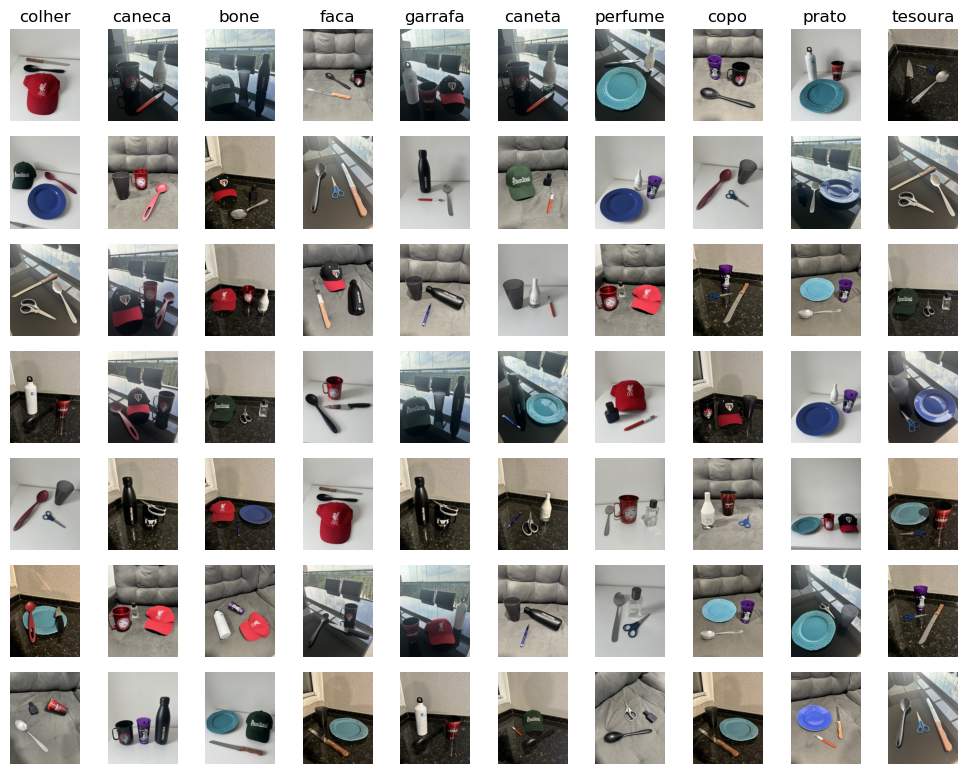

In [3]:
show_samples_all_classes(original_dataset_folder, gray_scale=False)

### Showing a Global Table about the Data

In [4]:
show_global_table(original_dataset_folder)

Tabela Global Sumária: 
--> Nome das Classes: ['colher', 'caneca', 'bone', 'faca', 'garrafa', 'caneta', 'perfume', 'copo', 'prato', 'tesoura']
--> Número de Classes: 10
--> Número de Imagens: 100
--> Tamanho da Base (Bytes): 11210524 (11.21 MB)
--> Resolução das Imagens: 682 linhas por 512 colunas


### Showing one Table for each Class

In [5]:
show_class_tables(original_dataset_folder)


 ==> Nome da classe: colher
 ==> Numero de objetos por imagem: 3
 ==> Variacoes de fundo: 4 -> Sacada Branco Marmore Sofa 
 ==> Variacoes de iluminacao: 4 -> ('Fora', 'Dia') ('Dentro', 'Dia') ('Fora', 'Noite') ('Dentro', 'Noite') 
 ==> Total de amostras: 37

 ==> Nome da classe: caneca
 ==> Numero de objetos por imagem: 3
 ==> Variacoes de fundo: 4 -> Sacada Branco Sofa Marmore 
 ==> Variacoes de iluminacao: 4 -> ('Fora', 'Dia') ('Dentro', 'Dia') ('Dentro', 'Noite') ('Fora', 'Noite') 
 ==> Total de amostras: 26

 ==> Nome da classe: bone
 ==> Numero de objetos por imagem: 3
 ==> Variacoes de fundo: 4 -> Sacada Branco Sofa Marmore 
 ==> Variacoes de iluminacao: 4 -> ('Fora', 'Dia') ('Dentro', 'Dia') ('Dentro', 'Noite') ('Fora', 'Noite') 
 ==> Total de amostras: 36

 ==> Nome da classe: faca
 ==> Numero de objetos por imagem: 3
 ==> Variacoes de fundo: 4 -> Branco Sofa Sacada Marmore 
 ==> Variacoes de iluminacao: 4 -> ('Dentro', 'Dia') ('Dentro', 'Noite') ('Fora', 'Dia') ('Fora', 'Noit

## Data Augmentation

In [6]:
import os
import cv2
import pandas as pd
import numpy as np

### Auxiliary Methods to Apply Augmentation Methods

In [7]:
def applyAugmentation(input_folder: str, output_folder: str, augmentation_function, *args):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    metadata_path = os.path.join(input_folder, "metadata.csv")
    metadata = pd.read_csv(metadata_path)
    updated_metadata = []

    for _, row in metadata.iterrows():
        image_name = row['Nome_da_Imagem']
        location, period = row["Local"], row["Periodo"]
        input_path = os.path.join(input_folder, image_name)
        output_path = os.path.join(output_folder, image_name)
        img = cv2.imread(input_path)
        new_img = apply_function_with_parameters(augmentation_function, img, location, period, *args)
        cv2.imwrite(output_path, new_img)

        image_size = os.path.getsize(output_path)
        row['Image_Size'] = image_size
        updated_metadata.append(row)
    
    updated_metadata_df = pd.DataFrame(updated_metadata)
    updated_metadata_path = os.path.join(output_folder, 'metadata.csv')
    updated_metadata_df.to_csv(updated_metadata_path, index=False)

def apply_function_with_parameters(function, img, location, period, *args):
    if len(args) == 0:
        return function(img)
    
    combinations_mapping = {
        ('Dentro', 'Dia'): 0,
        ('Dentro', 'Noite'): 1,
        ('Fora', 'Dia'): 2,
        ('Fora', 'Noite'): 3,
    }
    combination = (location, period)
    index_value = combinations_mapping.get(combination, None)

    parameters = []
    for i in range(len(args)):
        parameters.append(args[i][index_value])

    return function(img, *parameters)

### RGB2gray

In [8]:
def RGB2gray(img):
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return grayscale_img

In [9]:
gray_output_folder = "./images/originalGrayDataset"
applyAugmentation(original_dataset_folder, gray_output_folder, RGB2gray)

### Contrast Stretching

In [10]:
def contrastStretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * (255 / (max_val - min_val))
    stretched = np.clip(stretched, 0, 255).astype(np.uint8)
    return stretched

In [11]:
input_gray_images = "./images/originalGrayDataset"
contrast_output_folder = "./images/augmentedDataset/contrastStretching"

applyAugmentation(input_gray_images, contrast_output_folder, contrastStretching)

### Image Logarithm

For both Logarithm and Exponential functions, output pixel intensities are clipped: values above 255 are set to 255, and values below 0 are set to 0. Normalization is not applied to the outputs because it could undo the rescaling applied by the parameter C.

In [12]:
def imageLogarithm(image, c):
    epsilon = 1e-6
    log_image = c * np.log(1 + image + epsilon)
    log_image = np.clip(log_image, 0, 255).astype(np.uint8)
    return log_image

In [13]:
input_gray_images = "./images/originalGrayDataset"
logarithm_output_folder = "./images/augmentedDataset/imageLogarithm"

c_values_log = [20, 23, 18, 30] # (dentro/dia), (dentro/noite), (fora/dia), (fora/noite)
applyAugmentation(input_gray_images, logarithm_output_folder, imageLogarithm, c_values_log)

### Image Exponential

In [14]:
def imageExponential(image, c, gamma):
    exp_image = c * (image ** gamma)
    exp_image = np.clip(exp_image, 0, 255).astype(np.uint8)
    return exp_image

In [15]:
input_gray_images = "./images/originalGrayDataset"
exponential_output_folder = "./images/augmentedDataset/imageExponential"

c_values_exp = [0.08, 2.5, 0.4, 2] # (dentro/dia), (dentro/noite), (fora/dia), (fora/noite)
gamma_values = [1.5, 0.8, 1.2, 0.9] # (dentro/dia), (dentro/noite), (fora/dia), (fora/noite)
applyAugmentation(input_gray_images, exponential_output_folder, imageExponential, c_values_exp, gamma_values)

### Image Laplacian

#### Method that Implements 2D Convolution

In [16]:
def convolveImage(image, kernel):
    image_height, image_width, num_channels = image.shape
    kernel = np.rot90(kernel, 2)
    kernel_height, kernel_width = kernel.shape
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)),
                            mode='constant', constant_values=0)
    
    output = np.zeros_like(image)
    for c in range(num_channels):
        for y in range(image_height):
            for x in range(image_width):
                output[y, x, c] = np.sum(padded_image[y:y+kernel_height, x:x+kernel_width, c] * kernel)
    
    return output

In [17]:
def imageLaplacian(image):
    kernel = np.asarray([[0, 1, 0],
                        [1, -4, 1],
                        [0, 1, 0]])
    new_image = convolveImage(image, kernel)
    return new_image

In [18]:
input_gray_images = "./images/originalGrayDataset"
laplacian_output_folder = "./images/augmentedDataset/imageLaplacian"

applyAugmentation(input_gray_images, laplacian_output_folder, imageLaplacian)

### Convolutional Mean Filter

In [19]:
def applyMeanFilter(image):
    kernel = np.ones((3,3)) * 1/9
    new_image = convolveImage(image, kernel)
    return new_image

In [20]:
input_gray_images = "./images/originalGrayDataset"
mean_output_folder = "./images/augmentedDataset/convolutionalMeanFilter"

applyAugmentation(input_gray_images, mean_output_folder, applyMeanFilter)

### Visualizing the Gray Scale Images

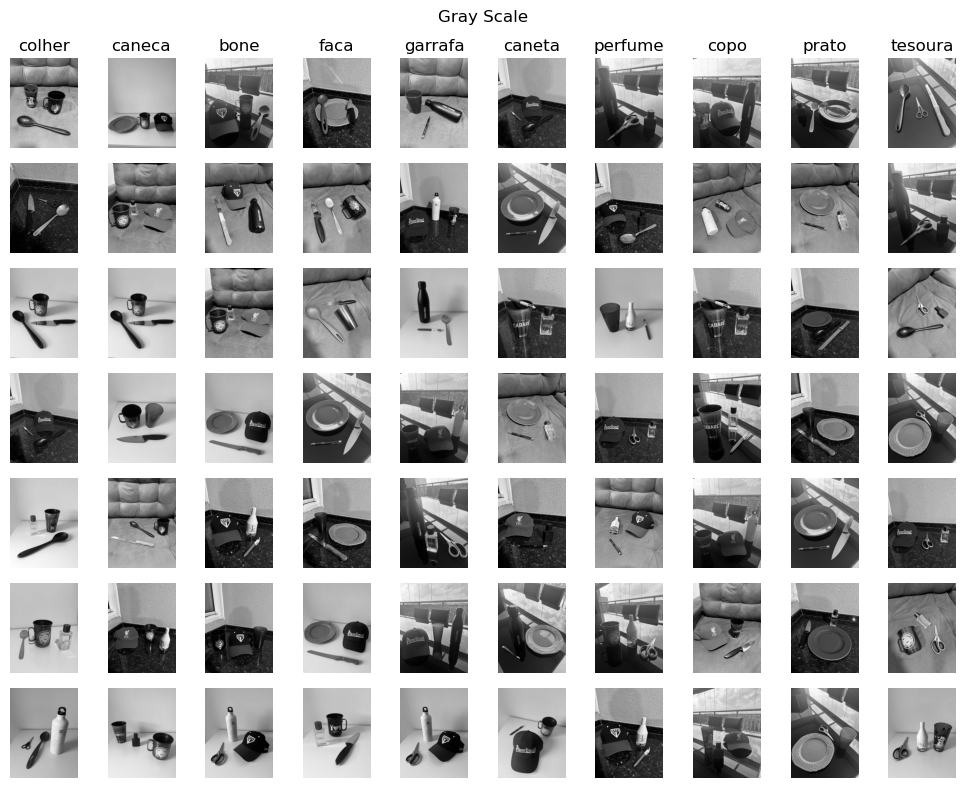

Tabela Global Sumária: Gray Scale
--> Nome das Classes: ['colher', 'caneca', 'bone', 'faca', 'garrafa', 'caneta', 'perfume', 'copo', 'prato', 'tesoura']
--> Número de Classes: 10
--> Número de Imagens: 100
--> Tamanho da Base (Bytes): 10486482 (10.49 MB)
--> Resolução das Imagens: 682 linhas por 512 colunas


In [21]:
gray_folder = "./images/originalGrayDataset"
show_samples_all_classes(gray_folder, title="Gray Scale")
show_global_table(gray_folder, title="Gray Scale")

### Visualizing the Results of the Augmentation Methods

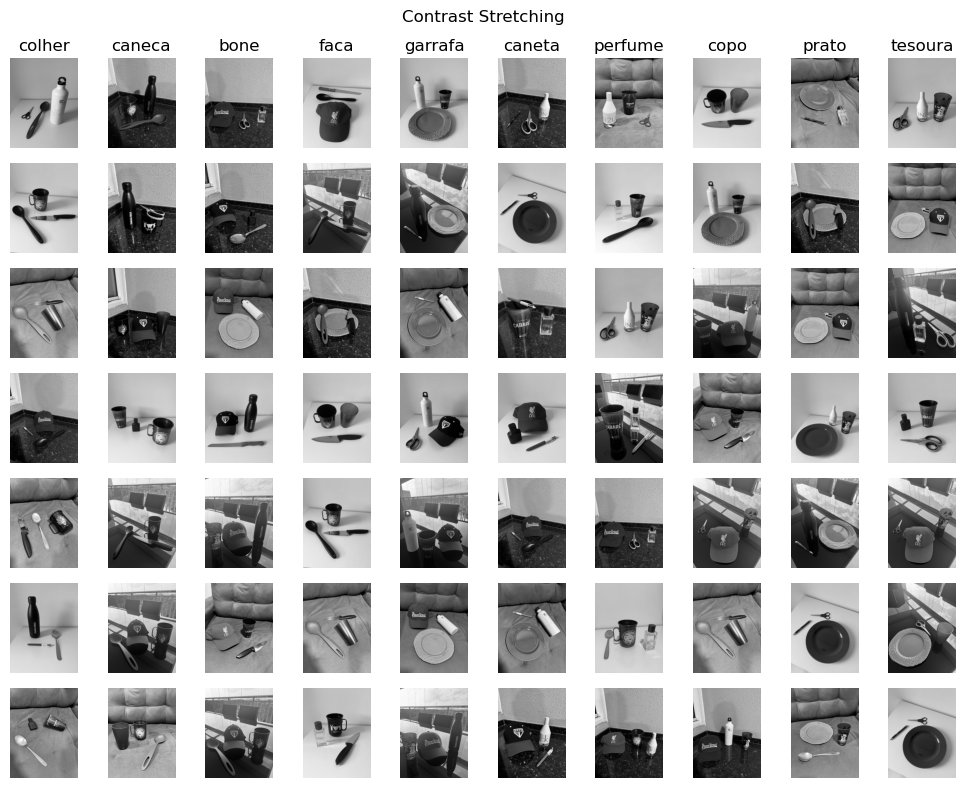

Tabela Global Sumária: Contrast Stretching
--> Nome das Classes: ['colher', 'caneca', 'bone', 'faca', 'garrafa', 'caneta', 'perfume', 'copo', 'prato', 'tesoura']
--> Número de Classes: 10
--> Número de Imagens: 100
--> Tamanho da Base (Bytes): 10718300 (10.72 MB)
--> Resolução das Imagens: 682 linhas por 512 colunas


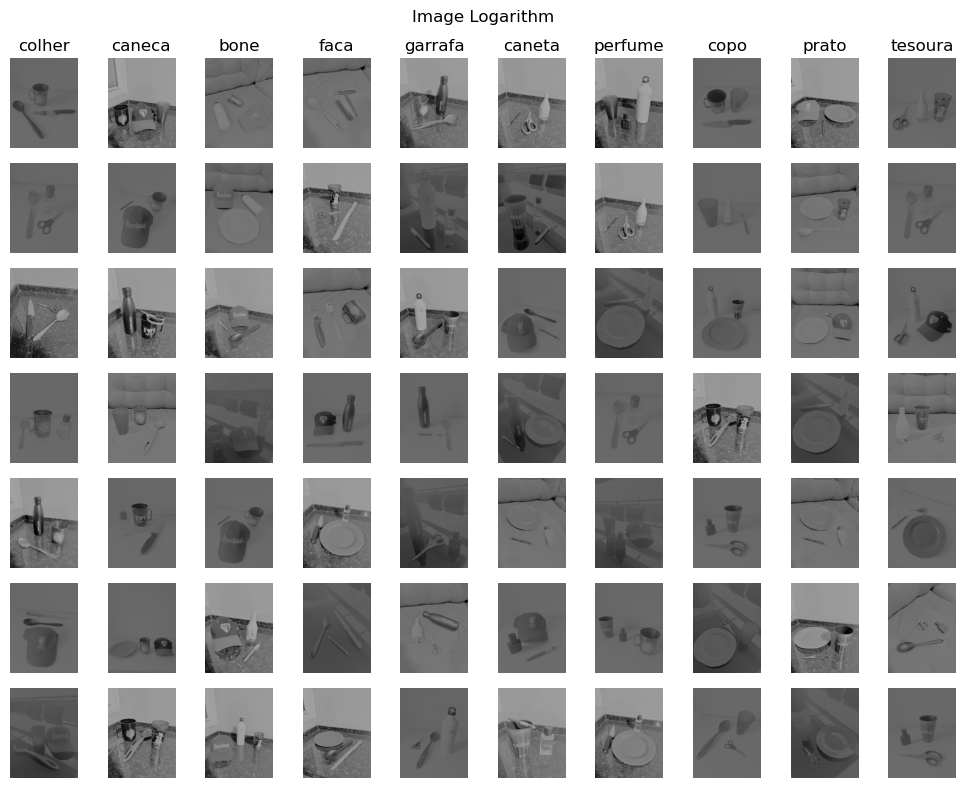

Tabela Global Sumária: Image Logarithm
--> Nome das Classes: ['colher', 'caneca', 'bone', 'faca', 'garrafa', 'caneta', 'perfume', 'copo', 'prato', 'tesoura']
--> Número de Classes: 10
--> Número de Imagens: 100
--> Tamanho da Base (Bytes): 5591480 (5.59 MB)
--> Resolução das Imagens: 682 linhas por 512 colunas


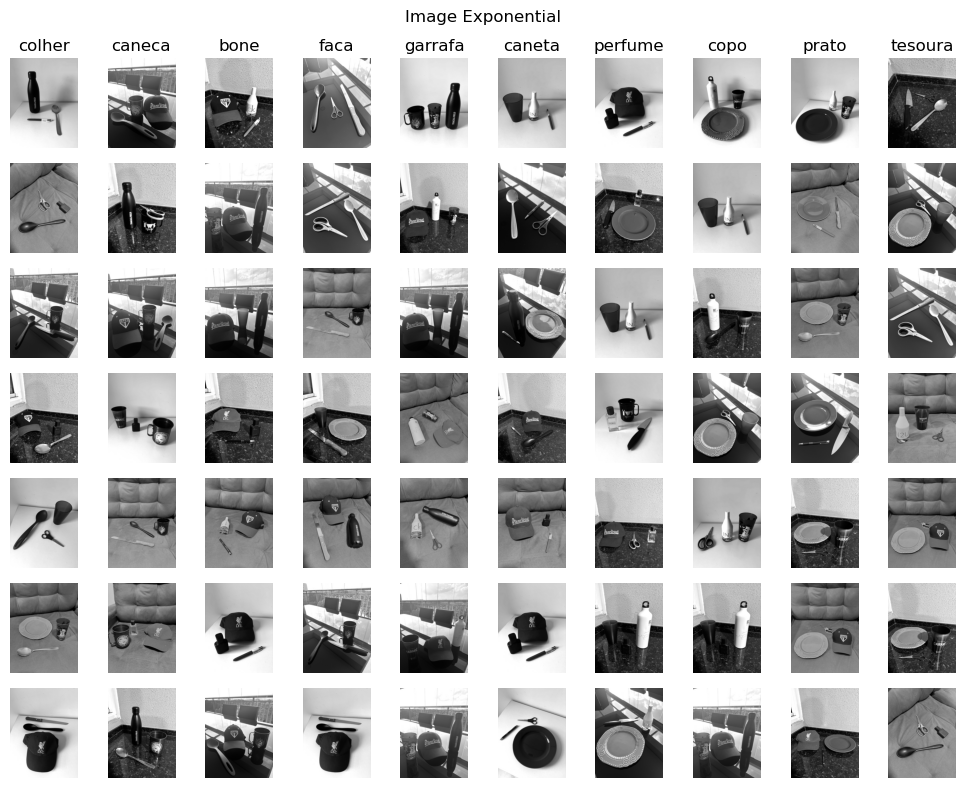

Tabela Global Sumária: Image Exponential
--> Nome das Classes: ['colher', 'caneca', 'bone', 'faca', 'garrafa', 'caneta', 'perfume', 'copo', 'prato', 'tesoura']
--> Número de Classes: 10
--> Número de Imagens: 100
--> Tamanho da Base (Bytes): 10868707 (10.87 MB)
--> Resolução das Imagens: 682 linhas por 512 colunas


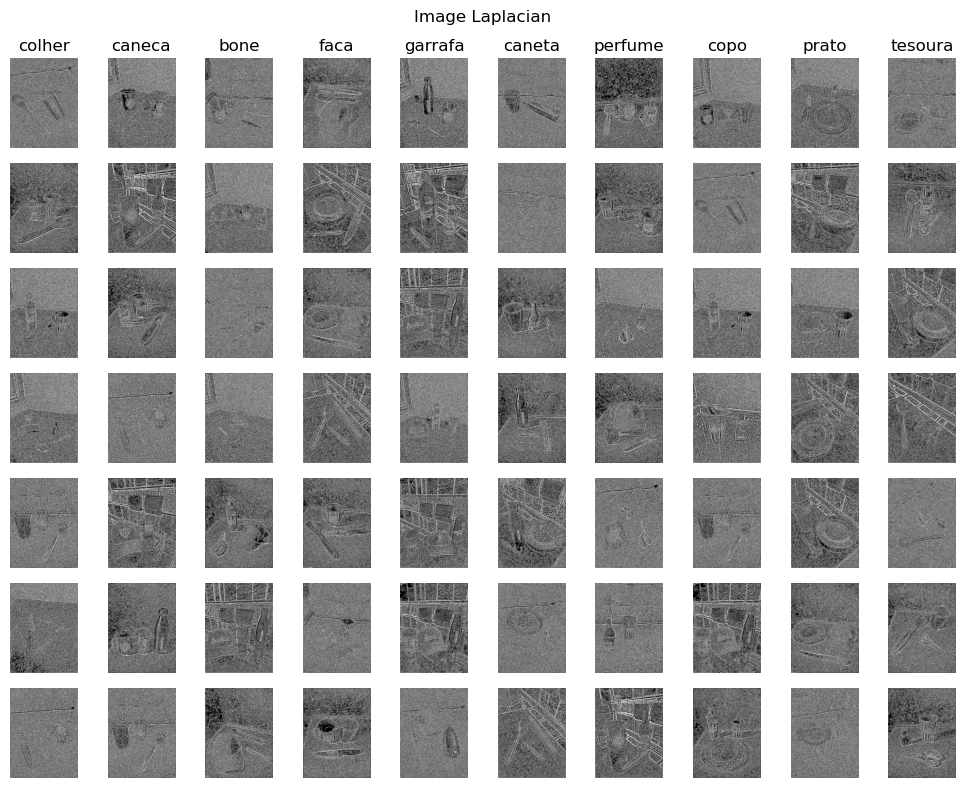

Tabela Global Sumária: Image Laplacian
--> Nome das Classes: ['colher', 'caneca', 'bone', 'faca', 'garrafa', 'caneta', 'perfume', 'copo', 'prato', 'tesoura']
--> Número de Classes: 10
--> Número de Imagens: 100
--> Tamanho da Base (Bytes): 39982477 (39.98 MB)
--> Resolução das Imagens: 682 linhas por 512 colunas


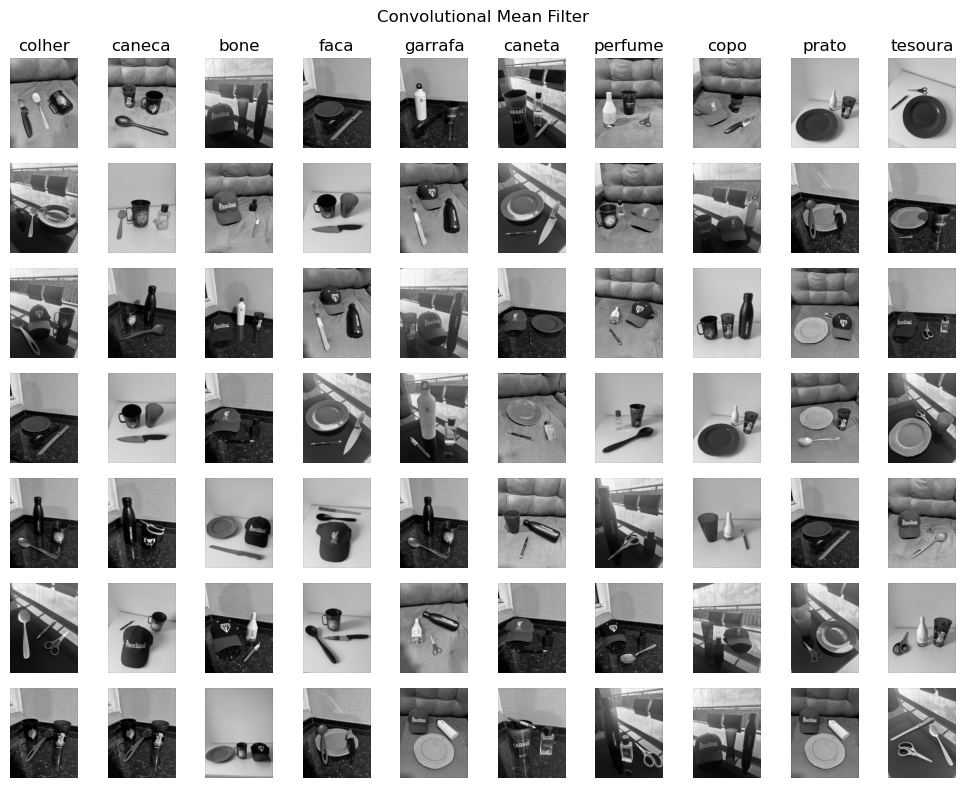

Tabela Global Sumária: Convolutional Mean Filter
--> Nome das Classes: ['colher', 'caneca', 'bone', 'faca', 'garrafa', 'caneta', 'perfume', 'copo', 'prato', 'tesoura']
--> Número de Classes: 10
--> Número de Imagens: 100
--> Tamanho da Base (Bytes): 7254310 (7.25 MB)
--> Resolução das Imagens: 682 linhas por 512 colunas


In [22]:
augmentation_folders = ["contrastStretching", "imageLogarithm", "imageExponential",
                        "imageLaplacian", "convolutionalMeanFilter"]
titles = ["Contrast Stretching", "Image Logarithm", "Image Exponential",
            "Image Laplacian", "Convolutional Mean Filter"]
augmented_folder = './images/augmentedDataset'

for i, folder in enumerate(augmentation_folders):
    folder_path = os.path.join(augmented_folder, folder)
    show_samples_all_classes(folder_path, title=titles[i])
    show_global_table(folder_path, title=titles[i])

## Remarks

- **Transformação Logarítmica**: Percebe-se que, tirando as imagens retiradas à noite em ambiente externo, todas as outras eram consideravelmente claras. Além disso, sabe-se que a transformação logarítmica é recomendada para imagens mais escuras, visto que a função logarítmica distribui os valores menores em um intervalo mais amplo, enquanto concentra os valores maiores em um intervalo mais curto. Além disso, a função logarítmica tende a reduzir a média das intensidades. Por consequência, a maior parte das imagens, por serem mais claras, passaram por uma redução de contraste e diminuição de claridade. Para tentar resolver isso, diferentes valores de C foram testados. No entanto, pelo baixo contraste, um aumento relevante de claridade (por valores maiores de C) passou a prejudicar a visualização. Com isso, escolheram-se valores para C que não aumentassem significativamente as intensidades, resultando em imagens mais escuras e com baixo contraste.